# Obtenemos información a base de gráficos del año 2020

## Instalamos algunas librerías

In [ ]:
!pip install wordcloud==1.8.1

     |████████████████████████████████| 366 kB 31.7 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


### Importamos las librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

> Asignamos los estilos de Matplotlib y Seaborn

In [ ]:
mpl.style.use(['seaborn'])
sns.set_theme(style="whitegrid")

## Leemos nuestros dataset

In [ ]:
df_2020 = pd.read_csv('/work/enaho-personas-estudios-caracteristicas-data-science/ENAHO-DATA-LIMPIA/2020.csv')
df_2020

,ANIO,UBIGEO,DOMINIO_G,ID_SEXO,EDAD,ID_ESTADO_CIVIL,COD_IDIOMA,COD_GRADO_ESTUDIOS,COD_CARRERA_UNI,COD_CENTRO_ESTUDIOS,COD_DEPARTAMENTO,NOM_DOMINIO_G,NOM_ESTADO_CIVIL,NOM_IDIOMA,NOM_GRADO_ESTUDIOS,NOM_CARRERA_UNI,NOM_CENTRO_ESTUDIOS,NOM_DEPARTAMENTO,SEXO
0,2020,10101,4,2,29,6,4,10,332336,160000076,1,Sierra Norte,Soltero,Castellano,Superior Universitaria Completa,Turismo y Hotelería,Universidad Nacional Toribio Rodríguez de Mend...,Amazonas,Mujer
1,2020,10101,4,1,18,6,4,9,321026,160000076,1,Sierra Norte,Soltero,Castellano,Superior Universitaria Incompleta,Ciencias de la Comunicación,Universidad Nacional Toribio Rodríguez de Mend...,Amazonas,Hombre
2,2020,10101,4,2,51,5,4,10,121016,160000031,14,Sierra Norte,Separado,Castellano,Superior Universitaria Completa,Educación Secundaria,Universidad Nacional Pedro Ruíz Gallo,Lambayeque,Mujer
3,2020,10101,4,2,27,6,4,10,713016,260000024,15,Sierra Norte,Soltero,Castellano,Superior Universitaria Completa,Estomatología,Universidad Inca Garcilaso de la Vega,Lima,Mujer
4,2020,10101,4,2,24,6,4,10,711026,260000044,14,Sierra Norte,Soltero,Castellano,Superior Universitaria Completa,Medicina Humana,Universidad Particular de Chiclayo,Lambayeque,Mujer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14056,2020,250101,7,2,40,2,4,10,714016,260000008,99,Selva,Casado,Castellano,Superior Universitaria Completa,Enfermería,Pontificia Universidad Católica del Perú,NaN,Mujer
14057,2020,250101,7,2,66,2,4,9,522016,160000022,99,Selva,Casado,Castellano,Superior Universitaria Incompleta,Industrias Alimentarias,Universidad Nacional Agraria de la Selva,NaN,Mujer
14058,2020,250101,7,2,22,6,4,10,342056,260000059,15,Selva,Soltero,Castellano,Superior Universitaria Completa,Contabilidad,Universidad Alas Peruanas,Lima,Mujer
14059,2020,250101,7,1,28,6,4,12,-1,-1,-1,Selva,Soltero,Castellano,Básica especial,NaN,NaN,NaN,Hombre


> Verificamos nuestras columnas

In [ ]:
df_2020.columns

Index(['ANIO', 'UBIGEO', 'DOMINIO_G', 'ID_SEXO', 'EDAD', 'ID_ESTADO_CIVIL',
       'COD_IDIOMA', 'COD_GRADO_ESTUDIOS', 'COD_CARRERA_UNI',
       'COD_CENTRO_ESTUDIOS', 'COD_DEPARTAMENTO', 'NOM_DOMINIO_G',
       'NOM_ESTADO_CIVIL', 'NOM_IDIOMA', 'NOM_GRADO_ESTUDIOS',
       'NOM_CARRERA_UNI', 'NOM_CENTRO_ESTUDIOS', 'NOM_DEPARTAMENTO', 'SEXO'],
      dtype='object')

> Verificamos si hay valores nulo o vacíos

In [ ]:
df_2020.isnull().sum()

ANIO                      0
UBIGEO                    0
DOMINIO_G                 0
ID_SEXO                   0
EDAD                      0
ID_ESTADO_CIVIL           0
COD_IDIOMA                0
COD_GRADO_ESTUDIOS        0
COD_CARRERA_UNI           0
COD_CENTRO_ESTUDIOS       0
COD_DEPARTAMENTO          0
NOM_DOMINIO_G             0
NOM_ESTADO_CIVIL         24
NOM_IDIOMA                3
NOM_GRADO_ESTUDIOS        0
NOM_CARRERA_UNI        7007
NOM_CENTRO_ESTUDIOS    7162
NOM_DEPARTAMENTO       7172
SEXO                      0
dtype: int64

### Lidiamos con algunos valores nulos o 'Missing values'

In [ ]:
# reemplazamos los missing value con nan
df_2020.replace('Missing value', np.nan, inplace = True)

> Creamos una columna para realizar operaciones incrementales

In [ ]:
df_2020['TOTAL'] = 1

## INICIAMOS A SACAR IMPORTANTE INFORMACIÓN

### Total de acuerdo al Grado de Estudios

In [ ]:
# Cuantos tienen distintos grados académicos
df_grado_total = df_2020.groupby(by = ['NOM_GRADO_ESTUDIOS']).sum()['TOTAL'].to_frame()
df_grado_total

,TOTAL
NOM_GRADO_ESTUDIOS,
Básica especial,130
Maestria/doctorado,1219
Superior Universitaria Completa,6930
Superior Universitaria Incompleta,5779


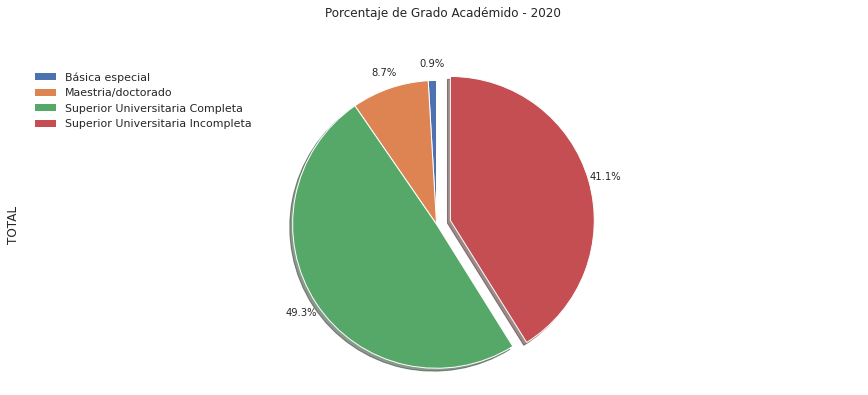

In [ ]:
plt.figure(figsize=(15,10))

colors_list = ['lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0, 0.1]

df_grado_total['TOTAL'].plot(kind='pie',
                    figsize=(15, 6),
                    autopct='%1.1f%%',
                    startangle=90,
                    shadow=True,
                    labels=None,
                    pctdistance=1.12,
                    # colors=colors_list,
                    explode=explode_list
                    )

plt.title('Porcentaje de Grado Académido - 2020', y=1.12) 
plt.axis('equal')
plt.legend(labels=df_grado_total.index, loc='upper left') 
plt.show()

### Total de personas de acuerdo al género

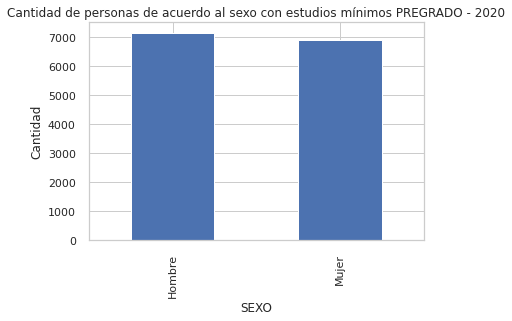

In [ ]:
df_2020.groupby(by = 'SEXO').sum()['TOTAL'].plot(kind = 'bar')
plt.title('Cantidad de personas de acuerdo al sexo con estudios mínimos PREGRADO - 2020')
plt.ylabel('Cantidad')
plt.show()

### Total Hombres y Mujeres de acuerdo al Grado académido y la EDAD

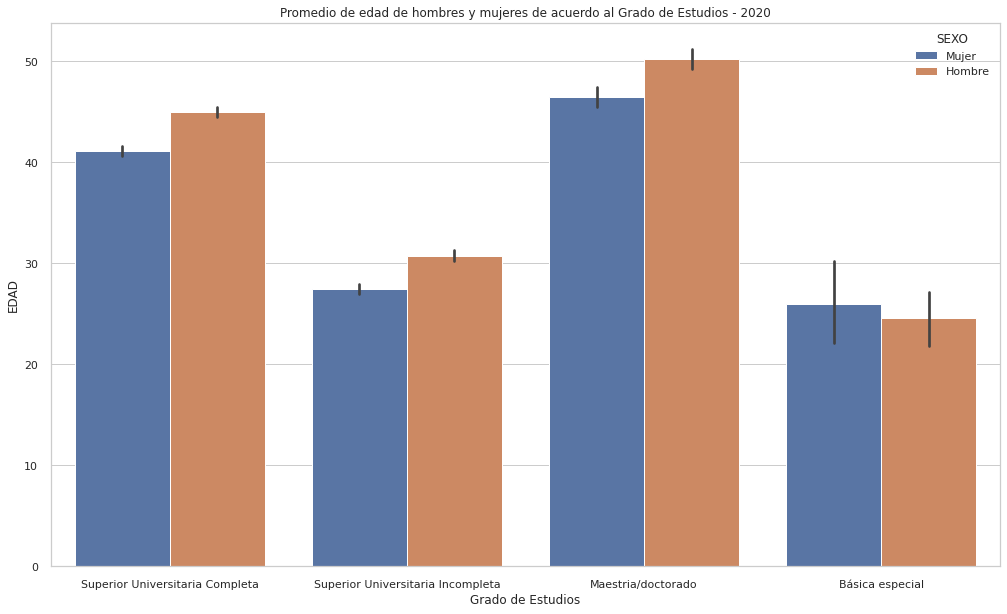

In [ ]:
plt.figure(figsize=(17,10))
sns.barplot(x = 'NOM_GRADO_ESTUDIOS', y = 'EDAD', hue = 'SEXO', data = df_2020)
plt.title('Promedio de edad de hombres y mujeres de acuerdo al Grado de Estudios - 2020')
plt.xlabel('Grado de Estudios')
plt.show()

### En regiones hay más estudiantes

In [ ]:
df_total_regiones = df_2020.groupby(by = 'NOM_DEPARTAMENTO').sum()['TOTAL'].to_frame().sort_values(by = 'TOTAL', ascending=False)
df_total_regiones

,TOTAL
NOM_DEPARTAMENTO,
Lima,2220
La Libertad,742
Arequipa,449
Lambayeque,369
Ancash,342
Tacna,313
Junín,310
Ica,267
Loreto,224


> Los valores nan reemplazamos con vacío para poder concatenar

In [ ]:
text = ''
# sacamos que departamentos están más personas con más de pregrado
texts = ','.join(df_2020['NOM_DEPARTAMENTO'].replace([np.nan, ' '], ''))

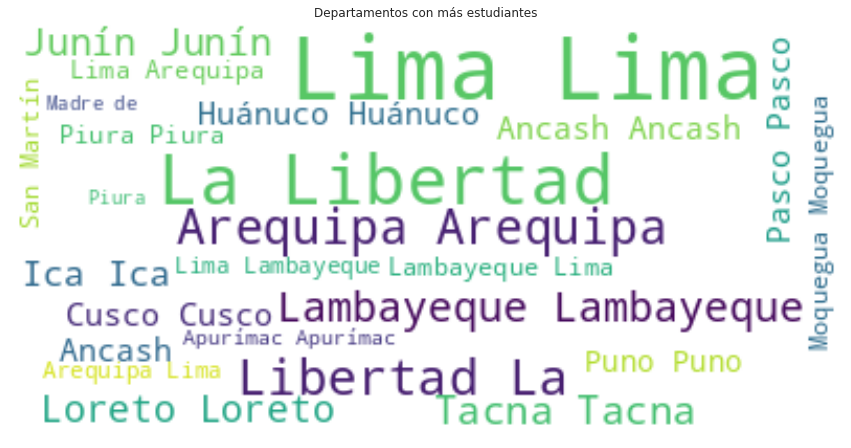

In [ ]:
plt.figure(figsize=(15,12), facecolor=None)

stopwords = STOPWORDS

regiones_wc = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=25,
    max_font_size=42,
    random_state=42
)
regiones_wc.generate(texts)

plt.imshow(regiones_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Departamentos con más estudiantes')
plt.show()

### PSICOLOGÍA - PREGRADO

> Filtramos nuestro data set

In [ ]:
data_psicologia = df_2020[(df_2020['NOM_CARRERA_UNI'] == "Psicología") & (df_2020['COD_GRADO_ESTUDIOS'] == 9)]
data_psicologia

,ANIO,UBIGEO,DOMINIO_G,ID_SEXO,EDAD,ID_ESTADO_CIVIL,COD_IDIOMA,COD_GRADO_ESTUDIOS,COD_CARRERA_UNI,COD_CENTRO_ESTUDIOS,COD_DEPARTAMENTO,NOM_DOMINIO_G,NOM_ESTADO_CIVIL,NOM_IDIOMA,NOM_GRADO_ESTUDIOS,NOM_CARRERA_UNI,NOM_CENTRO_ESTUDIOS,NOM_DEPARTAMENTO,SEXO,TOTAL
13,2020,10306,4,2,22,6,4,9,313016,160000076,1,Sierra Norte,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Nacional Toribio Rodríguez de Mend...,Amazonas,Mujer,1
40,2020,22008,5,2,20,6,4,9,313016,260000053,2,Sierra Centro,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Católica Los Ángeles de Chimbote,Ancash,Mujer,1
105,2020,40110,6,2,19,6,4,9,313016,260000059,15,Sierra Sur,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Alas Peruanas,Lima,Mujer,1
168,2020,50103,5,2,21,6,1,9,313016,260000053,2,Sierra Centro,Soltero,Quechua,Superior Universitaria Incompleta,Psicología,Universidad Católica Los Ángeles de Chimbote,Ancash,Mujer,1
253,2020,80106,6,2,18,6,4,9,313016,160000003,8,Sierra Sur,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Nacional de San Antonio Abad del C...,Cusco,Mujer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13728,2020,60601,4,2,19,6,4,9,313016,260000055,13,Sierra Norte,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Particular del Norte,La Libertad,Mujer,1
13830,2020,130102,1,2,24,5,4,9,313016,260000053,2,Costa Norte,Separado,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Católica Los Ángeles de Chimbote,Ancash,Mujer,1
13861,2020,150116,8,2,24,6,4,9,313016,260000054,15,Lima Metropolitana,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Peruana de Ciencias Aplicadas,Lima,Mujer,1
13883,2020,150121,8,1,20,6,4,9,313016,260000080,15,Lima Metropolitana,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Antonio Ruíz de Montoya,Lima,Hombre,1


In [ ]:
# Cantidad de personas que estudían Psicología PREGRADO

In [ ]:
print(f'Número de personas PREGRADO que estudían PSICOLOGÍA: {data_psicologia.shape[0]}')

Número de personas PREGRADO que estudían PSICOLOGÍA: 120


#### Número de Varones y Mujeres

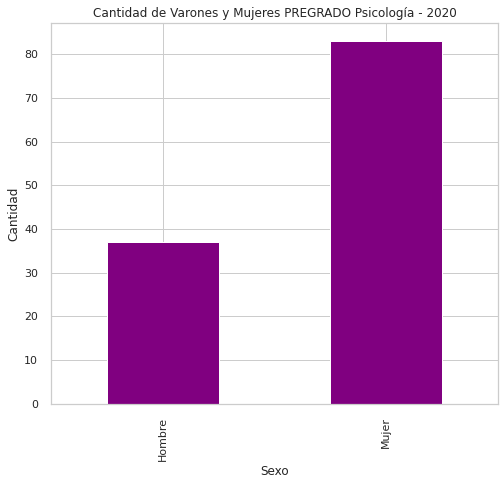

In [ ]:
plt.figure(figsize=(8,7))
data_psicologia.groupby(by = 'SEXO').sum()['TOTAL'].plot(kind = 'bar', color = 'purple')
plt.title('Cantidad de Varones y Mujeres PREGRADO Psicología - 2020')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()

### PREGRADO

> Filtramos a todas las personas con grado de estudios PREGRADO

In [ ]:
# personas que estudiaron alguna carrera de pregrado
df_pregrado = df_2020[df_2020['COD_GRADO_ESTUDIOS']==9]
df_pregrado

,ANIO,UBIGEO,DOMINIO_G,ID_SEXO,EDAD,ID_ESTADO_CIVIL,COD_IDIOMA,COD_GRADO_ESTUDIOS,COD_CARRERA_UNI,COD_CENTRO_ESTUDIOS,COD_DEPARTAMENTO,NOM_DOMINIO_G,NOM_ESTADO_CIVIL,NOM_IDIOMA,NOM_GRADO_ESTUDIOS,NOM_CARRERA_UNI,NOM_CENTRO_ESTUDIOS,NOM_DEPARTAMENTO,SEXO,TOTAL
1,2020,10101,4,1,18,6,4,9,321026,160000076,1,Sierra Norte,Soltero,Castellano,Superior Universitaria Incompleta,Ciencias de la Comunicación,Universidad Nacional Toribio Rodríguez de Mend...,Amazonas,Hombre,1
11,2020,10203,7,2,19,6,4,9,714016,260000072,14,Selva,Soltero,Castellano,Superior Universitaria Incompleta,Enfermería,Universidad Particular Señor de Sipán S.A.C.,Lambayeque,Mujer,1
13,2020,10306,4,2,22,6,4,9,313016,160000076,1,Sierra Norte,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Nacional Toribio Rodríguez de Mend...,Amazonas,Mujer,1
14,2020,10306,4,2,22,6,4,9,341116,260000072,14,Sierra Norte,Soltero,Castellano,Superior Universitaria Incompleta,Ingeniería Económica,Universidad Particular Señor de Sipán S.A.C.,Lambayeque,Mujer,1
16,2020,10306,4,1,19,6,4,9,531016,160000031,14,Sierra Norte,Soltero,Castellano,Superior Universitaria Incompleta,Ingeniería Civil,Universidad Nacional Pedro Ruíz Gallo,Lambayeque,Hombre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14048,2020,240301,1,1,19,6,4,9,531016,260000046,13,Costa Norte,Soltero,Castellano,Superior Universitaria Incompleta,Ingeniería Civil,Universidad P. Antenor Orrego,La Libertad,Hombre,1
14050,2020,240105,1,2,20,6,4,9,111026,160000041,24,Costa Norte,Soltero,Castellano,Superior Universitaria Incompleta,Educación Inicial,Universidad Nacional de Tumbes,Tumbes,Mujer,1
14053,2020,250105,7,2,36,6,4,9,531016,260000053,2,Selva,Soltero,Castellano,Superior Universitaria Incompleta,Ingeniería Civil,Universidad Católica Los Ángeles de Chimbote,Ancash,Mujer,1
14054,2020,250105,7,2,28,6,4,9,111026,160000084,25,Selva,Soltero,Castellano,Superior Universitaria Incompleta,Educación Inicial,Universidad Nacional Intercultural de la Amazonía,Ucayali,Mujer,1


#### 5 carrerás universitarias más estudiadas en 2020

In [ ]:
# 5 carreras más estudiadas en pregrado 2020
df_pregrado_top_5_carreras = df_pregrado.groupby(by = 'NOM_CARRERA_UNI', as_index = False).sum().sort_values(by = 'TOTAL', ascending = False)
df_pregrado_top_5_carreras.reset_index(drop = True, inplace = True)
df_pregrado_top_5_carreras.head()

,NOM_CARRERA_UNI,ANIO,UBIGEO,DOMINIO_G,ID_SEXO,EDAD,ID_ESTADO_CIVIL,COD_IDIOMA,COD_GRADO_ESTUDIOS,COD_CARRERA_UNI,COD_CENTRO_ESTUDIOS,COD_DEPARTAMENTO,TOTAL
0,Derecho,436320,30171793,999,333,6309,1028,847,1944,75819456,54880009824,3101,216
1,Ingeniería Civil,414100,28273251,967,239,5176,1068,793,1845,108858280,50120009076,3089,205
2,Contabilidad,351480,22279531,845,260,5852,777,654,1566,59517744,39380007396,2457,174
3,Administración de Empresas,280780,19421716,713,206,4516,614,538,1251,46014004,32080006170,1750,139
4,Psicología,242400,16963368,571,203,3083,638,456,1080,37561920,29300005748,1557,120


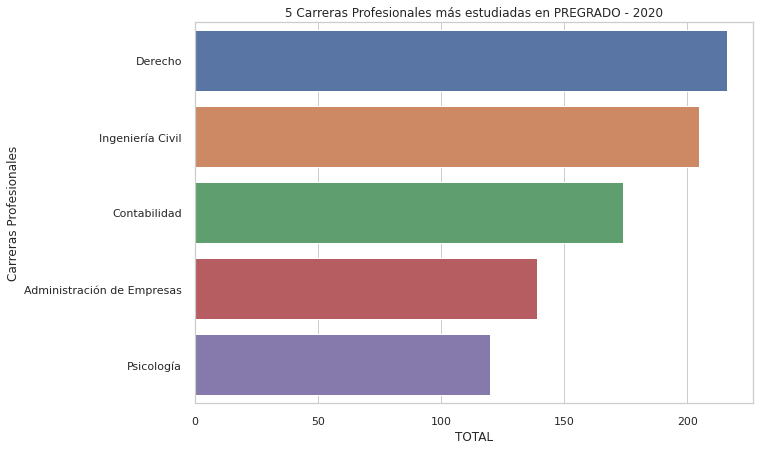

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(y = 'NOM_CARRERA_UNI', x = 'TOTAL', data = df_pregrado_top_5_carreras.head())
plt.title('5 Carreras Profesionales más estudiadas en PREGRADO - 2020')
plt.ylabel('Carreras Profesionales')
plt.show()

## Obtenemos información relevante para guardar en un solo Dataset

- df_grado_total

In [ ]:
df_grado_total

,TOTAL
NOM_GRADO_ESTUDIOS,
Básica especial,130
Maestria/doctorado,1219
Superior Universitaria Completa,6930
Superior Universitaria Incompleta,5779


In [ ]:
data_psicologia

,ANIO,UBIGEO,DOMINIO_G,ID_SEXO,EDAD,ID_ESTADO_CIVIL,COD_IDIOMA,COD_GRADO_ESTUDIOS,COD_CARRERA_UNI,COD_CENTRO_ESTUDIOS,COD_DEPARTAMENTO,NOM_DOMINIO_G,NOM_ESTADO_CIVIL,NOM_IDIOMA,NOM_GRADO_ESTUDIOS,NOM_CARRERA_UNI,NOM_CENTRO_ESTUDIOS,NOM_DEPARTAMENTO,SEXO,TOTAL
13,2020,10306,4,2,22,6,4,9,313016,160000076,1,Sierra Norte,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Nacional Toribio Rodríguez de Mend...,Amazonas,Mujer,1
40,2020,22008,5,2,20,6,4,9,313016,260000053,2,Sierra Centro,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Católica Los Ángeles de Chimbote,Ancash,Mujer,1
105,2020,40110,6,2,19,6,4,9,313016,260000059,15,Sierra Sur,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Alas Peruanas,Lima,Mujer,1
168,2020,50103,5,2,21,6,1,9,313016,260000053,2,Sierra Centro,Soltero,Quechua,Superior Universitaria Incompleta,Psicología,Universidad Católica Los Ángeles de Chimbote,Ancash,Mujer,1
253,2020,80106,6,2,18,6,4,9,313016,160000003,8,Sierra Sur,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Nacional de San Antonio Abad del C...,Cusco,Mujer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13728,2020,60601,4,2,19,6,4,9,313016,260000055,13,Sierra Norte,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Particular del Norte,La Libertad,Mujer,1
13830,2020,130102,1,2,24,5,4,9,313016,260000053,2,Costa Norte,Separado,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Católica Los Ángeles de Chimbote,Ancash,Mujer,1
13861,2020,150116,8,2,24,6,4,9,313016,260000054,15,Lima Metropolitana,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Peruana de Ciencias Aplicadas,Lima,Mujer,1
13883,2020,150121,8,1,20,6,4,9,313016,260000080,15,Lima Metropolitana,Soltero,Castellano,Superior Universitaria Incompleta,Psicología,Universidad Antonio Ruíz de Montoya,Lima,Hombre,1


In [ ]:
df_total_regiones

,TOTAL
NOM_DEPARTAMENTO,
Lima,2220
La Libertad,742
Arequipa,449
Lambayeque,369
Ancash,342
Tacna,313
Junín,310
Ica,267
Loreto,224


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=61180446-cfea-4338-ac0e-81e50a732b69' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>